## Exercise 10
[editted]

Download the `MA_cbg_human_mobility_2019.zip` file from Canvas under `Files/datasets`. Unzip it and use the `MA_cbg2cbg_2019_01.csv` file to finish the following tasks. Submit a jupyter notebook with your code and the plots. 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [32]:
import pandas as pd
import os 


In [ ]:
import networkx as nx

In [6]:
humanmob_df = pd.read_csv('~/Downloads/MA_cbg2cbg_2019_01.csv')

In [19]:
humanmob_df.head()

,poi_cbg,year_month,raw_device_counts,visitor_census_tract,visitor_count
0,250250303003,2019_1,19187,250250303003,413
1,250250303003,2019_1,19187,250251010016,182
2,250250303003,2019_1,19187,440070008003,122
3,250250303003,2019_1,19187,250250923002,121
4,250250303003,2019_1,19187,250173686001,112



## Task 1. 
Create a human mobility network for MA using the provided csv file.          

network node: individual census block group (neighborhood) in MA


network edge: residents from one neighborhood visiting another

weight of network tie: percentage of residents from one neighborhood visiting another         

How many nodes and edges are there in your network? 



In [34]:
grouped = humanmob_df.groupby(['poi_cbg' , 'visitor_census_tract']).size()


In [35]:
grouped

poi_cbg       visitor_census_tract
250010101001  60372761002             1
              60730020012             1
              60971539021             1
              80050068552             1
              90010207003             1
                                     ..
250277614006  490111254032            1
              500070001002            1
              500070030001            1
              511076102012            1
              511159513004            1
Length: 840593, dtype: int64

In [11]:
import networkx as nx
G = nx.Graph()

In [12]:
for i in range(len(humanmob_df)):
    origin_cbg = humanmob_df.loc[i, 'poi_cbg']
    destination_cbg = humanmob_df.loc[i, 'visitor_census_tract']
    total_residents_in_origin = humanmob_df.loc[i, 'raw_device_counts']
    num_visitor = humanmob_df.loc[i, 'visitor_count']
    percent_visitor = num_visitor / total_residents_in_origin
    #print(origin_cbg, destination_cbg, percent_visitor)
    # add an edge/tie between two neighborhoods with weight being percentage of residents from one neighborhood visiting another
    G.add_edge(origin_cbg, destination_cbg, weight=percent_visitor)
    # G.remove_edge(origin_cbg, destination_cbg) # removing edge

Task 2. Calculate weighted node degree and unweighted node degree for each census block group in the mobility network and use the results to create a pandas dataframe. The dataframe should have three columns. One column stores the census block group id, and the other two the two calculated node degrees. 

In [37]:
GU = nx.Graph()
origin_cbg_ = []
for i in range(len(humanmob_df)):
    origin_cbg= humanmob_df.loc[i, 'poi_cbg']
    origin_cbg_.append(origin_cbg)
    destination_cbg = humanmob_df.loc[i, 'visitor_census_tract']
    total_residents_in_origin = humanmob_df.loc[i, 'raw_device_counts']
    num_visitor = humanmob_df.loc[i, 'visitor_count']
    percent_visitor = num_visitor / total_residents_in_origin
    #print(origin_cbg, destination_cbg, percent_visitor)
    # add an edge/tie between two neighborhoods with weight being percentage of residents from one neighborhood visiting another
    GU.add_edge(origin_cbg, destination_cbg)
    # G.remove_edge(origin_cbg, destination_cbg) # removing edge

In [25]:
degrees_un = [val for (node, val) in GU.degree()]
degrees_un[4]


3217

In [26]:
degrees = [val for (node, val) in G.degree()]
degrees[4]

3217

In [38]:
data = pd.DataFrame()
data['id'] = origin_cbg_ 
data['degree_w'] = degrees
data['unweighted'] = degrees_un
data

ValueError: Length of values (40292) does not match length of index (840593)

Task 3. Create a plot that visualizes the distribution of the weighted node degrees. Is the human mobility network a scale-free network? In other words, does the degree distribution follow a power law? 

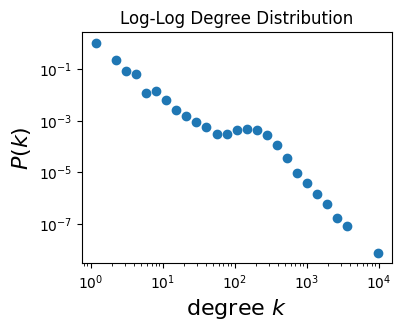

In [17]:
import matplotlib.pyplot as plt
import numpy as np
kmin = min(degrees)
kmax = max(degrees) 


  # Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=30)

  # histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)


fig, ax = plt.subplots(figsize=(4,3))#,dpi=200
  # "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10 ** ((log_be[:-1] + log_be[1:]) / 2)

plt.title("Log-Log Degree Distribution")
plt.loglog(x, density, marker='o',linestyle='none',label='degree')

plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
# remove right and top boundaries because they're ugly
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
  # Show the plot

plt.show()

Yes, not a pure power law but we see the pattern.

Bonus task: Does this network follow the “six degrees of separation” principle? Find out ways to analyze the network to answer this question. [1 extra point]

In [39]:
print(nx.average_shortest_path_length(G)) # I believe this will igve the result but it took so long
#if it is equal to or less than 6, this newtork follow six degrees of separation

KeyboardInterrupt: 